# PREDICTING PHONE PRICES

Predicting cellphone prices based on its features.

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## DATA

In [114]:
df = pd.read_csv('DATA/Cellphone.csv')
df.head()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_id    161 non-null    int64  
 1   Price         161 non-null    int64  
 2   Sale          161 non-null    int64  
 3   weight        161 non-null    float64
 4   resoloution   161 non-null    float64
 5   ppi           161 non-null    int64  
 6   cpu core      161 non-null    int64  
 7   cpu freq      161 non-null    float64
 8   internal mem  161 non-null    float64
 9   ram           161 non-null    float64
 10  RearCam       161 non-null    float64
 11  Front_Cam     161 non-null    float64
 12  battery       161 non-null    int64  
 13  thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


#### Drop 'Product_id' since it won't affect the price. ####

In [116]:
df.drop('Product_id', axis=1, inplace=True)
df

,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,2357,10,135.0,5.20,424,8,1.350,16.0,3.000,13.00,8.0,2610,7.4
1,1749,10,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
2,1916,10,110.0,4.70,312,4,1.200,8.0,1.500,13.00,5.0,2000,7.6
3,1315,11,118.5,4.00,233,2,1.300,4.0,0.512,3.15,0.0,1400,11.0
4,1749,11,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,3551,4638,178.0,5.46,538,4,1.875,128.0,6.000,12.00,16.0,4080,8.4
157,3211,8016,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9
158,3260,8809,150.0,5.50,401,8,2.200,64.0,4.000,20.00,20.0,3000,6.8
159,3211,8946,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9


#### View the correlations ####

<AxesSubplot: >

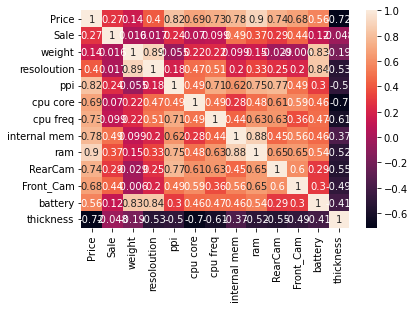

In [117]:
sns.heatmap(data=df.corr(), annot=True)

In [118]:
df.corr()['Price'].sort_values()

thickness      -0.716773
weight          0.144555
Sale            0.273263
resoloution     0.404010
battery         0.559946
Front_Cam       0.675286
cpu core        0.686811
cpu freq        0.727383
RearCam         0.739538
internal mem    0.776738
ppi             0.817614
ram             0.896915
Price           1.000000
Name: Price, dtype: float64

## PREPAING THE DATA FOR TRAINING

In [119]:
X = df.drop('Price', axis=1)
y = df['Price']

In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## MODEL TRAINING

#### Using grid search to find best hyperparameters for Elastic Net ####

In [123]:
from sklearn.linear_model import ElasticNet
model = ElasticNet(max_iter=10000)
params={'l1_ratio':[.01, .25, .5, .75, .99],
        'alpha':[0.1,1,5,10,20]}

from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(model, params, verbose=0)
grid.fit(X_train, y_train)
grid.best_estimator_

ElasticNet(alpha=0.1, l1_ratio=0.99, max_iter=10000)

### PERFORMANCE EVALUATION

In [124]:
y_pred = grid.predict(X_test)

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9266033812593051